# Project 04-04: Kmeans Clustering
*by Thorge Dobbertin, Julia Köberle, Marilena Wittmaack und Benedict Wolf*


In [1]:
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 300
import sklearn.cluster as sk

## WWDK Package

We created a Package divided into three modules. The first module *Data* preprocesses our data to make clustering easier. The next module *Cluster* allows to choose a clustering method to cluster the data. The third module *Utilities* contains useful functions to present the data and compare our Clustering methods against the sklearn implementations

In [2]:
from wwdk import data as d
from wwdk import cluster as cl
from wwdk import utilities as u

## Kmeans

The Kmeans class uses the sklearn estimators and cotains the following methods:

In [ ]:
Kmeans(inits=10, k=8, maxit=300, method="++", tol = 1e-3)

##### inits : int, optional, default:10
Number of random initializations that are tried. 
##### k : int, optional, default:8
The number of clusters to form as well as the number of centroids to generate.
##### maxit : int, optional, default:300
Maximal amount of iterations from creation of a minibatch to moving the centroids to new position.
##### method : {‘++’ or ‘rng’}, default: ‘++’
Method for initialization, defaults to ‘++’:

‘++’ : selects initial cluster centers for k-mean clustering in a smart way to speed up convergence. 

‘rng’: choose x points at random from data for the initial centroids.
##### tol : float, optional, default:1e-3
Control early stopping based on the difference between the old and new centroids' positions. 


In [ ]:
Kmeans.fit(data)

Fits the data into k clusters, returns:

cluster_centers_ = centroids

labels_ = assignments to centroids

inertia_ = best_clust

In [ ]:
Kmeans.transform(data)

Transforms the dataset into the point-cluster distances of each point.
Returns:

labels_ = assignments to centroids

In [ ]:
Kmeans.predict(data)

Predicts the labels for a given dataset. Returns a matrix with the distances between each datapoint and centroid.

## Minibatch Kmeans

Different to Kmeans, MiniBatchKMeans uses not all data points at once to cluster the data, but uses randomly chosen batches from data.
The MiniBatchKMeans class contains the following methods:

In [ ]:
MiniBatchKMeans(k=8, inits=10, max_iterations=300, tol=1e-3, batch_size=100, method = "++")

##### k : int, optional, default:8
The number of clusters to form as well as the number of centroids to generate.
##### inits : int, optional, default:10
not included now, but may be added
##### max_iterations : int, optional, default:300
Maximal amount of iterations from creation of a minibatch to moving the centroids to new position.
##### tol : float, optional, default:1e-3
Control early stopping based on the difference between the old and new centroids' positions. 
##### batch_size : int, optional, default:100
Size of the mini batches. 
  
**method : {‘++’ or ‘rng’}, default: ‘++’**  
  
Method for initialization, defaults to ‘++’:

‘++’ : selects initial cluster centers for k-mean clustering in a smart way to speed up convergence. 

‘rng’: choose x points at random from data for the initial centroids.

In [ ]:
MiniBatchKMeans.create_batch(data)

Chooses random points from data.

In [ ]:
MiniBatchKMeans.initialize(data)

Sets centroid points from data randomly(‘rng’) or with k++ method (‘++’).

In [ ]:
MiniBatchKMeans.expectation(data, centroids)

Measures the euclidean distance between each point of data and each centroid.

In [ ]:
MiniBatchKMeans.maximization(data, assignments, centroids, centroid_count)

Assigns datapoints to centroids and counts the assigned points to calculate a learning rate. The centroids are moved to newly determined centroids according to learning rate.

In [ ]:
MiniBatchKMeans.final_assignments(data, centroids)

Assigns all datapoints of data to centroids.

In [ ]:
MiniBatchKMeans.fit(data)

Fits the data into k clusters, using the methods explained before. Returns:

labels_ = assignments to centroids

cluster_centers_ = centroids

In [ ]:
MiniBatchKMeans.predict(data)

Predicts the labels for a given dataset. Returns a matrix with the distances between each datapoint and centroid.

In [ ]:
MiniBatchKMeans.transform(data)

Transforms the dataset into the point-cluster distances of each point.
Returns:

labels_ = assignments to centroids

## WWDK vs sklearn

First we have a look at a random training data set. The 8 cluster are already clearly visible in this case.
We use this data to compare our algorithm (WWDK) and the sklearn implementation.

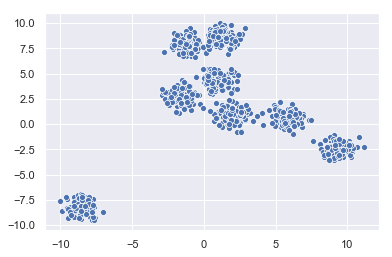

In [3]:
from sklearn.datasets.samples_generator import make_blobs 
import seaborn as sns; sns.set()
 
my_tuple = X, y_true = make_blobs(n_samples=1000, centers=8,
                       cluster_std=0.60, random_state=0)
sns.scatterplot(X[:, 0], X[:, 1]);

Looking at an elbow plot, its difficult to determine the best number of centroids k. The global distribution of the data is challenging as some clusters are really close together and we have an outlier. 

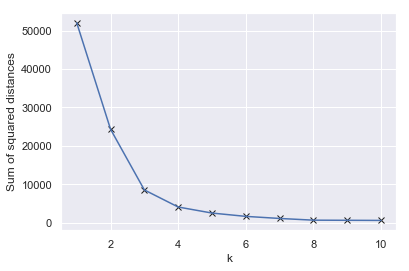

In [4]:
u.elbow_plot(X, max_k=10) 

#uses our WWDK vanilla code with set parameters to calculate the inertia

As we know what to expect, we choose the number of clusters k=8. 

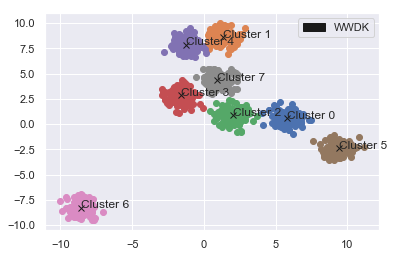

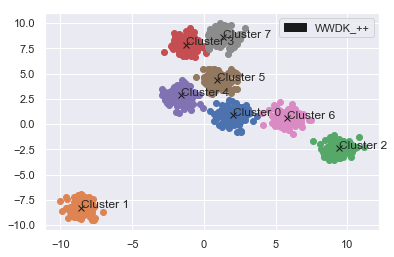

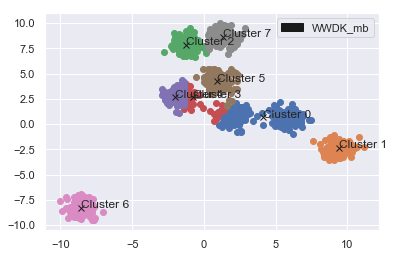

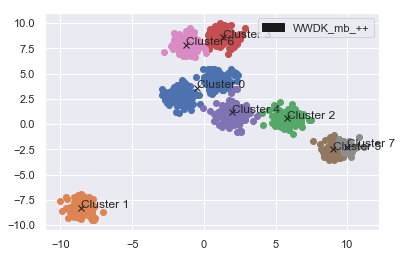

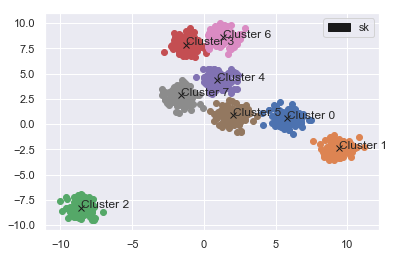

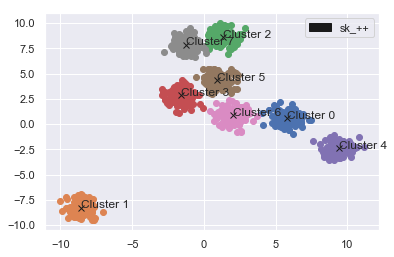

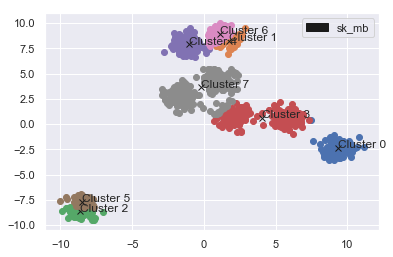

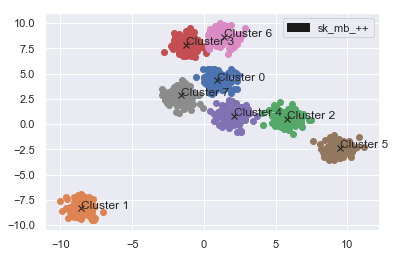

In [6]:
WWDK = cl.Kmeans(method="rng", k=8)
X1 = WWDK.fit(X)

WWDKplus = cl.Kmeans(k=8)
X2 = WWDKplus.fit(X)

WWDKmb = cl.MiniBatchKMeans(method="rng", k=8)
X3 = WWDKmb.fit(X)

WWDKmbplus = cl.MiniBatchKMeans(k=8)
X4 = WWDKmbplus.fit(X)

SK = sk.KMeans(init="random", n_clusters=8)
X5 = SK.fit(X)

skplus = sk.KMeans(n_clusters=8)
X6 = skplus.fit(X)

skmb = sk.MiniBatchKMeans(init="random", n_clusters=8)
X7 = skmb.fit(X)

skmbplus = sk.MiniBatchKMeans(n_clusters=8)
X8 = skmbplus.fit(X)

#useful definition from our utilities module to quickly plot clustering, k=8 had to be defined for labeling
u.plot_compare(X,WWDK.labels_, WWDK.cluster_centers_, 8, title="WWDK")
u.plot_compare(X,WWDKplus.labels_, WWDKplus.cluster_centers_, 8, title="WWDK_++")
u.plot_compare(X,WWDKmb.labels_, WWDKmb.cluster_centers_, 8, title="WWDK_mb")
u.plot_compare(X,WWDKmbplus.labels_, WWDKmbplus.cluster_centers_, 8, title="WWDK_mb_++")
u.plot_compare(X,SK.labels_, SK.cluster_centers_, 8, title="sk")
u.plot_compare(X,skplus.labels_, skplus.cluster_centers_, 8, title="sk_++")
u.plot_compare(X,skmb.labels_, skmb.cluster_centers_, 8, title="sk_mb")
u.plot_compare(X,skmbplus.labels_,skmbplus.cluster_centers_, 8, title="sk_mb_++")

Most of the time all algorithms seem to give us a reasonable clustering. Only our minibatch implementation seems to have problems most of the times, which is often fixed with the ++ implementation.

Comparing our package to sklearn we find our algorithm to be slower (regarding different number of centroids k and several runs/ inits) but of very similiar cluster quality.
For better understanding: our utility functions contain 2 parameters without defaults

time_k_plot(data, iterations, runs)

time_k_plot_mb(data, iterations, runs)

inertia_k_plot(data, iterations, runs)

time_init_plot(data, iterations, runs)

##### iterations
Maximal number of x variable which is tested against (k or inits)

##### runs
Number of repetitions for the whole code (for each x parameter which we test against). Takes the mean in the end. This is to avoid random fluctuations inherent to the algorithm itself.


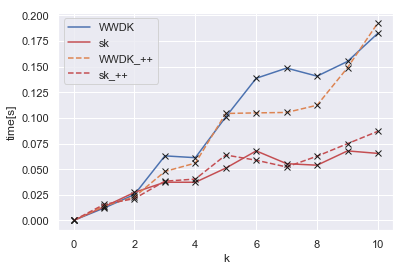

In [7]:
u.time_k_plot(X, iterations=10, runs=10)

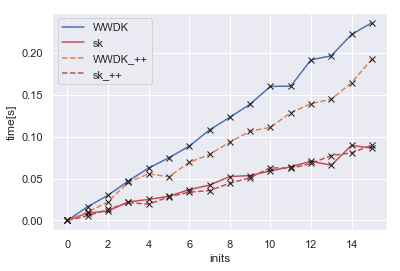

In [8]:
u.time_init_plot(X, iterations=15, runs=10)

The difference between WWDK and sklearn becomes more eveident for higher k and inits. Nontheless it is notable that our ++ implementation can be even faster than our vanilla initiation.

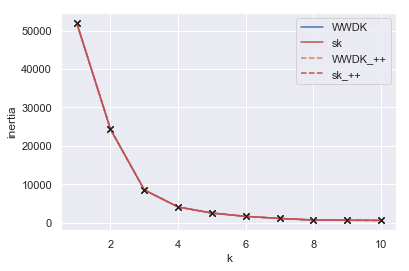

In [5]:
u.inertia_k_plot(X, iterations=10, runs=10) #inertia... Sum of squared distances of samples to their closest cluster center

Slower but WWDK minimises the inertia as well as sklearn without notable difference between ++ and random initiation.

#### Now we test the MiniBatch:

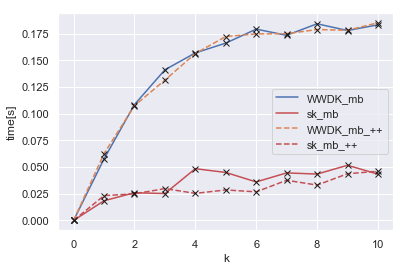

In [10]:
u.time_k_plot_mb(X, iterations=10, runs=10)

The time difference between WWDK and sklearn is more evedient than before, especially for smaller k.

We compare our minibatch against our fullbatch approach:

In [ ]:
u.time_k_wwdk_compare(X, iterations=20, runs=5, batchsize=100) #another parameter batchsize to increase comparison possibilities

Minibatch only becomes faster for larger k. As minibatch is designed for bigger datasets, we can better see its advantage looking at one:

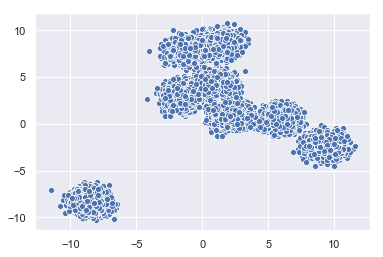

In [14]:
from sklearn.datasets.samples_generator import make_blobs 
import seaborn as sns; sns.set()
 
my_tuple = X2, y_true = make_blobs(n_samples=30000, centers=8,
                       cluster_std=0.60, random_state=0)
sns.scatterplot(X2[:, 0], X2[:, 1]);

In [ ]:
u.time_k_wwdk_compare(X2, iterations=10, runs=5, batchsize=100)

Instead of 1000 we now look at 30000 datapoints. Here it becomes evident why Minibatch is useful.

### Limitations of kmeans - why to look at the assumptions

Next we look at a datset with a more difficult geometric shape

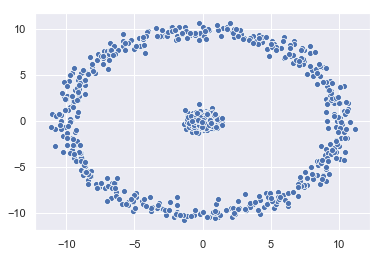

In [15]:
from sklearn import datasets
my_tuple = x, y_true = datasets.make_circles(n_samples=1000, factor=0,
                                      noise=.05)
x= x*10
sns.scatterplot(x[:, 0], x[:, 1]);

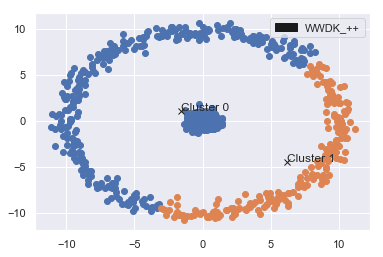

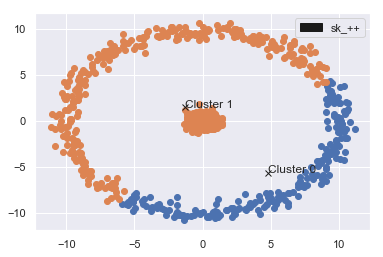

In [17]:
wwdk1 = cl.Kmeans(inits=10, method="rng", k=2)
x1 = wwdk1.fit(x)
sk1 = sk.KMeans(n_init=10, init="random", n_clusters=2)
x2 = sk1.fit(x)

u.plot_compare(x, wwdk1.labels_, wwdk1.cluster_centers_, 2, title="WWDK_++")
u.plot_compare(x, sk1.labels_, sk1.cluster_centers_, 2, title="sk_++")

The algorithms still minimize the within square distance perfectly fine and thereby find clusters. But the minimization assumes spheric clusters. For non-spherical clusters we can either use other algorithms or in some cases (if we know what kind of clusters to expect) we can transform our data beforehand. In this case we can run the algorithms on polar cooridnates instead.


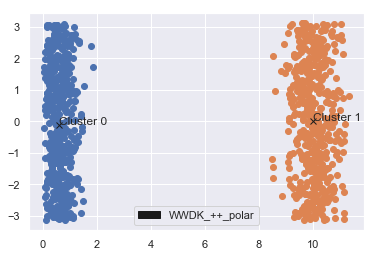

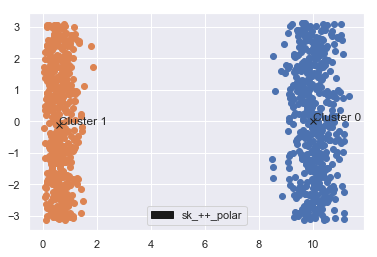

In [18]:
import numpy as np
def cart2pol(x, y):
    rho = np.sqrt(x**2 + y**2) 
    phi = np.arctan2(y, x)
    points = np.column_stack((rho,phi))
    return (points)
    #return ([rho,phi])

pol = cart2pol(x[:, 0], x[:, 1])

wwdk2 = cl.Kmeans(k=2)
x1 = wwdk2.fit(pol)
sk2 = sk.KMeans(n_clusters=2)
x2 = sk2.fit(pol)

u.plot_compare(pol, wwdk2.labels_, wwdk2.cluster_centers_, 2, title="WWDK_++_polar")
u.plot_compare(pol, sk2.labels_, sk2.cluster_centers_, 2, title="sk_++_polar")


Now we can use this labels to plot the cartesian data. Of course for a correct display the centers would need to be transformed back to cartesian coordinates, too (was not done here because they hold no useful information as cartesian).

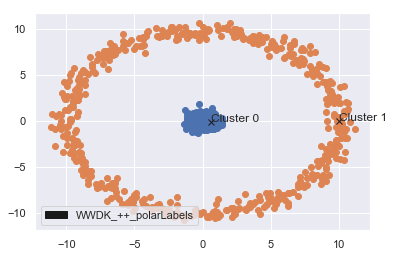

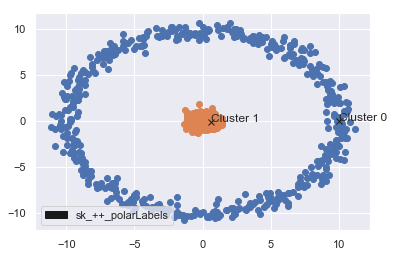

In [20]:
u.plot_compare(x, wwdk2.labels_, wwdk2.cluster_centers_, 2, title = "WWDK_++_polarLabels")
u.plot_compare(x, sk2.labels_, sk2.cluster_centers_, 2, title = "sk_++_polarLabels")

<b> By taking the assumptions our algorithm makes into consideration we can avoid and fix its drawbacks.

## Pokemon Dataset

In next step we wanted to analyze a pokemon dataset. This represents a easy to understand and relatively small dataset to test our clustering.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
pkmn = pd.read_csv('Pokemon/pokemon.csv', index_col=0)
pkmn.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


As one can see Pokemon all have a type and differ in stats of HP, Attack, Special Attack, Defense, Special Defense and Speed. We dropped Generation and Legendary status as we only wanted to see if we can see how Pokemon compare in this stats.

In [8]:
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.manifold import TSNE

red_pkmn = pkmn[["Attack","Defense","Sp. Atk", "Sp. Def","Speed", "Type 1"]]
pkmn_array = np.array(red_pkmn[["Attack","Defense","Sp. Atk", "Sp. Def","Speed"]])

### Without Dimensional Reduction

First we took a look at the dataset without any preprocessing at all. This was to test how our Kmeans handles multidimensional data and to see the difference between using dimensional reduction and not using it

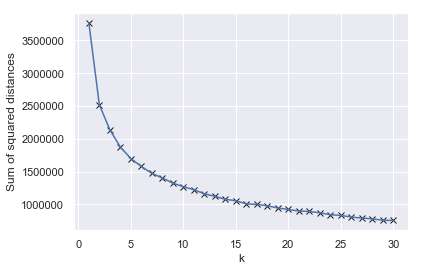

In [9]:
u.elbow_plot(pkmn_array,30)

We decided to choose ten cluster centers based on the elbow plot

In [6]:
kmeans_without_dr = cl.Kmeans(k=10)
kmeans_without_dr.fit(pkmn_array)

Kmeans(inits=10, k=10, maxit=300, method='++', tol=0.001)

To further compare the data we used the result from the clustering and used cluster labels as an index for the dataset. Then we sorted the pokemon by cluster and calculated the mean of each cluster to see what kind of strengths and weaknesses each Cluster has

In [7]:
pkmn_red =pkmn.drop(["Legendary", "Generation"], axis=1)
pkmn_red["Cluster"] = kmeans_without_dr.labels_

In [8]:
pkmn_comparer = pkmn_red[pkmn_red.Cluster == 0].mean(axis = 0)
pkmn_final = pd.DataFrame(pkmn_comparer).T
for i in range(9):
    pkmn_red[pkmn_red.Cluster == i+1].mean(axis = 0)
    pkmn_final = pkmn_final.append(pd.DataFrame(pkmn_red[pkmn_red.Cluster == i+1].mean(axis = 0)).T)

pkmn_final.set_index("Cluster").sort_values(by="Total")


,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
Cluster,,,,,,,
1.0,258.263736,52.758242,38.362637,41.472527,38.406593,45.439560,41.824176
3.0,342.794118,59.343137,72.078431,73.803922,43.950980,53.578431,40.039216
4.0,346.366197,57.640845,58.626761,46.457746,62.147887,53.915493,67.577465
5.0,459.194444,77.888889,72.592593,78.490741,88.472222,85.370370,56.379630
0.0,480.891089,71.782178,90.861386,68.683168,75.752475,69.138614,104.673267
9.0,497.473684,75.421053,101.842105,141.947368,60.131579,66.605263,51.526316
8.0,522.794118,83.720588,126.000000,89.676471,65.588235,84.852941,72.955882
2.0,527.391304,65.130435,68.043478,137.217391,67.608696,138.695652,50.695652
7.0,560.896104,78.714286,78.948052,84.532468,119.272727,103.857143,95.571429


One can see that Pokemon vary strongly between clusters when using the not dimensional reduced data. cluster 6 contains pokemon with overall highest total. If you have a closer look u will find megaevolutions and powerful pokemon like Mewtwo

In [15]:
pkmn_red[pkmn_red.Cluster == 6 ].head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Cluster
#,,,,,,,,,,,
6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,6
150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,6
150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,6
150,MewtwoMega Mewtwo Y,Psychic,NaN,780,106,150,70,194,120,140,6
250,Ho-oh,Fire,Flying,680,106,130,90,110,154,90,6


In [16]:
pkmn_red[pkmn_red.Cluster == 1 ].head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Cluster
#,,,,,,,,,,,
10,Caterpie,Bug,NaN,195,45,30,35,20,20,45,1
11,Metapod,Bug,NaN,205,50,20,55,25,25,30,1
13,Weedle,Bug,Poison,195,40,35,30,20,20,50,1
14,Kakuna,Bug,Poison,205,45,25,50,25,25,35,1
16,Pidgey,Normal,Flying,251,40,45,40,35,35,56,1


Looking in cluster 1, one can find a lot of pokemons that have not evolved yet and are therefor not strong. they all share a relatively small total

### With TSNE

Now we used dimensional reduction method to see if it yields different results. First the dataset was normalized and then scaled using the inbuilt sklearn preprocessing functions

In [10]:
norm_pkmn = preprocessing.normalize(red_pkmn[["Attack","Defense","Sp. Atk", "Sp. Def","Speed"]])
scaled = preprocessing.scale(norm_pkmn)

a TSNE was performend tu reduce dimensions to two

In [11]:
pure_sne = TSNE()
pkmn_pure_sned = pure_sne.fit_transform(scaled)

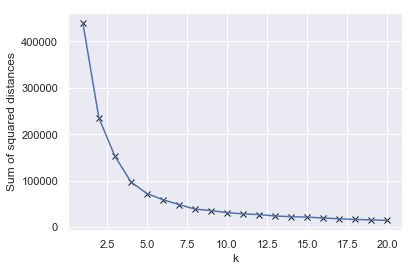

In [12]:
u.elbow_plot(pkmn_pure_sned, 20)

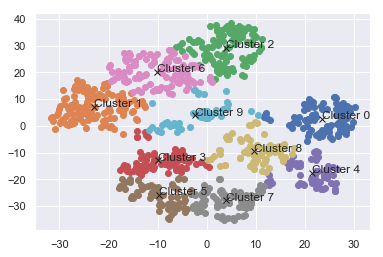

In [14]:
kmean_with_dr = cl.Kmeans(k = 10)
kmean_with_dr.fit(pkmn_pure_sned)
u.plot(kmean_with_dr)

One can see clearly the different clusters in the plot. when we plot the types of pokemon in a second plot we can also see that certain pokemon types cluster together. Normal type pokemon seem 

In [17]:
types = np.array(red_pkmn["Type 1"].drop_duplicates())
type_list = np.array(red_pkmn["Type 1"])
tsned_with_type =pd.DataFrame(pkmn_pure_sned)
tsned_with_type["Type"] = type_list

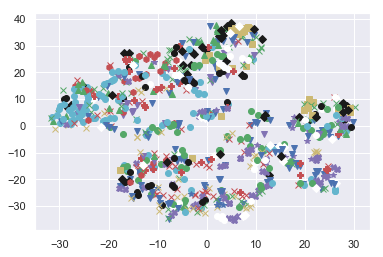

In [18]:
colors_shapes = ["go","rx","bv","gx", "co", "mv","yx","g^","m*","rh","mX","kD","wo","wD","rP","ko","ys","b*"]
dict_type_color = dict(zip(types,colors_shapes))
for i in range(tsned_with_type.shape[0]):
    color = dict_type_color[tsned_with_type.iloc[i,2]]
    plt.plot(tsned_with_type.iloc[i,0],tsned_with_type.iloc[i,1],color)
plt.show()

When we plot the types of pokemon in a second plot we can also see that certain pokemon types cluster together. Normal type pokemon seem to be all in Cluster 1 (blue dots). And also ground pokemon seem to be mainly in cluster 2 and 0. (yellow squares)

In [19]:
pkmn_red_with_dr =pkmn.drop(["Legendary", "Generation"], axis=1)
pkmn_red_with_dr["Cluster"] = kmean_with_dr.labels_

In [20]:
pkmn_comparer = pkmn_red_with_dr[pkmn_red_with_dr.Cluster == 0].mean(axis = 0)
pkmn_final = pd.DataFrame(pkmn_comparer).T
for i in range(9):
    pkmn_red_with_dr[pkmn_red_with_dr.Cluster == i+1].mean(axis = 0)
    pkmn_final = pkmn_final.append(pd.DataFrame(pkmn_red_with_dr[pkmn_red_with_dr.Cluster == i+1].mean(axis = 0)).T)
pkmn_final.set_index("Cluster")

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
Cluster,,,,,,,
0.0,427.111111,66.822222,59.922222,98.144444,62.355556,94.055556,45.811111
1.0,399.434783,62.391304,81.382609,58.460870,52.278261,57.521739,87.400000
2.0,409.375000,65.365385,84.163462,103.932692,49.682692,55.086538,51.144231
3.0,480.028571,80.128571,95.442857,65.171429,97.471429,66.728571,75.085714
4.0,442.383333,74.866667,53.800000,61.600000,81.883333,103.250000,66.983333
5.0,453.562500,66.656250,87.734375,52.078125,93.250000,57.328125,96.515625
6.0,447.504950,74.980198,109.386139,75.237624,58.465347,70.653465,58.782178
7.0,442.835616,61.410959,58.452055,59.794521,98.315068,73.287671,91.575342
8.0,451.549296,74.183099,72.492958,74.802817,101.042254,80.788732,48.239437


As we have now a closer look at the clusters, we see that pokemon in certain cluster specialize in different stats.

In [21]:
pkmn_final.max()

Total      480.028571
HP          80.128571
Attack     109.386139
Defense    103.932692
Sp. Atk    101.042254
Sp. Def    103.250000
Speed       96.515625
Cluster      9.000000
dtype: float64

Cluster 3 contains the strongest overall pokemons with also the most HP. The strongst attackers can be found in Cluster 6 whereas the strongest defenders are in Cluster 2. The strongest special attackers are in Cluster 8 and strongest special Defenders in Cluster 4. If one wants the fastest pokemon, they can be found in Cluster 5.

**Conclusion:** Based on the Clusters one can create a nicely balanced pokemon team. Taking Pokemon from cluster 3 is always recommend because they are the strongest overall. Pokemon from Cluster 0, 1, 7 and 9 seem not to be as strong as the others

## PBMC Dataset

In [1]:
from wwdk import data as d
from wwdk import cluster as cl
from wwdk import utilities as u
import pandas as pd

In [13]:
data = d.Loader("http://cf.10xgenomics.com/samples/cell-exp/1.1.0/pbmc3k/pbmc3k_filtered_gene_bc_matrices.tar.gz")
unprocessed_data = data.process()[2]

In [3]:
unprocessed_data.describe()

,MIR1302-10,FAM138A,OR4F5,RP11-34P13.7,RP11-34P13.8,AL627309.1,RP11-34P13.14,RP11-34P13.9,AP006222.2,RP4-669L17.10,...,KIR3DL2-1,AL590523.1,CT476828.1,PNRC2-1,SRSF10-1,AC145205.1,BAGE5,CU459201.1,AC002321.2,AC002321.1
count,2700.0,2700.0,2700.0,2700.0,2700.0,2700.000000,2700.0,2700.0,2700.000000,2700.0,...,2700.0,2700.0,2700.0,2700.000000,2700.000000,2700.0,2700.0,2700.0,2700.0,2700.0
mean,0.0,0.0,0.0,0.0,0.0,0.003333,0.0,0.0,0.001111,0.0,...,0.0,0.0,0.0,0.042963,0.025926,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.057649,0.0,0.0,0.033321,0.0,...,0.0,0.0,0.0,0.213491,0.161258,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,1.000000,0.0,...,0.0,0.0,0.0,2.000000,2.000000,0.0,0.0,0.0,0.0,0.0


In [4]:
unprocessed_data.shape

(2700, 32738)

As the PBMC dataset is quite big and as there were a lot of genes in there with only zeros, we had to process the dataset. 

In [14]:
processed_data_umap = data.process()[0]
processed_data_tsne = data.process(method="tsne")[0]

/anaconda3/envs/igem/lib/python3.6/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 2 separate connected components using meta-embedding (experimental)
  n_components


Our processing algorithm includes quite a few steps:

1) Cells were deleted, which had a fraction of counts of mitochondrial genes versus all genes higher 5%. We did that because: High proportions are indicative of poor-quality cells (Islam et al. 2014; Ilicic et al. 2016), possibly because of loss of cytoplasmic RNA from perforated cells. The reasoning is that mitochondria are larger than individual transcript molecules and less likely to escape through tears in the cell membrane.

2) Morover genes were deleted, which were only expressed in less than 3 cells. -> After all that data has been deleted, the shape of the dataset was: **2643 cells × 13006 genes**

3) Next the data was normalised. 

4) With the normalised data, Principle Component Analysis was performed. 

5) Lastly either T-SNE or Umap was performed. Umap was setted as a standard. If you want to perform T-SNE, method="tsne" has to be oppted in. 

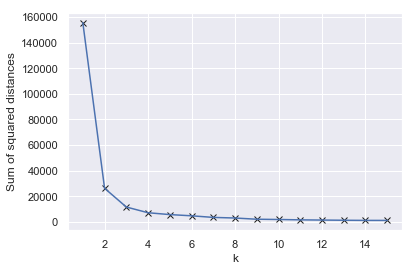

In [15]:
u.elbow_plot(processed_data_umap, max_k=15)

The elbow blot shows that the optimal amount of clusters is 2. Though the amount of 9 clusters delivered better results. 

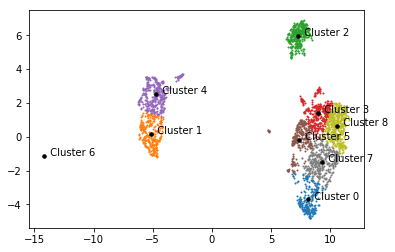

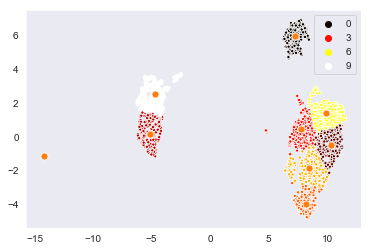

In [7]:
km_umap = cl.Kmeans(k=9).fit(processed_data_umap)
u.plot(km_umap)
u.plot_seaborn(processed_data_umap, ks=9, methods="++")

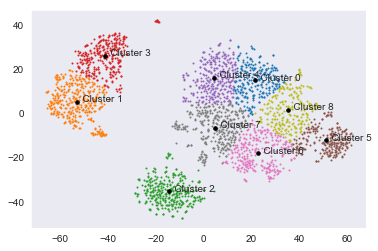

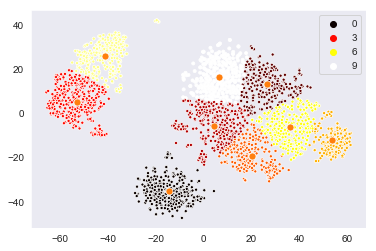

In [8]:
km_tsne = cl.Kmeans(k=9).fit(processed_data_tsne)
u.plot(km_tsne)
u.plot_seaborn(processed_data_tsne, ks=9, methods="++")

We performed umap and tsne. But as umap delivered clearer clusters, we only analysed the data with the clustered umap. 

In [9]:
minimised_data = data.process()[1]

/anaconda3/envs/test/lib/python3.7/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 2 separate connected components using meta-embedding (experimental)
  n_components


In [10]:
minimised_data.shape

(2643, 13006)

In [11]:
minimised_data["Cluster"] = km_umap.labels_

Here the data was used which was reduced (as explained ealier) but not normalised. To all the cells the cluster they were put into was added. 

In [12]:
comparer_data = minimised_data[minimised_data.Cluster ==0].mean(axis = 0)
final_comparer = pd.DataFrame(comparer_data).T
for i in range(8):
    minimised_data[minimised_data.Cluster == i+1].mean(axis = 0)
    final_comparer = final_comparer.append(pd.DataFrame(minimised_data[minimised_data.Cluster == i+1].mean(axis = 0)).T)
final_comparer = final_comparer.set_index("Cluster")

In [13]:
gene_names = final_comparer.T.index

In [14]:
final_comparer

,AL627309.1,RP11-206L10.2,LINC00115,NOC2L,KLHL17,PLEKHN1,HES4,RP11-54O7.11,ISG15,AGRN,...,MT-ND4L,MT-ND4,MT-ND5,MT-ND6,MT-CYB,AC145212.1,AL592183.1,AL354822.1,PNRC2-1,SRSF10-1
Cluster,,,,,,,,,,,,,,,,,,,,,
0.0,0.004115,0.000000,0.008230,0.144033,0.004115,0.004115,0.004115,0.000000,0.954733,0.000000,...,0.135802,3.950617,0.633745,0.102881,3.242798,0.004115,0.115226,0.000000,0.016461,0.024691
1.0,0.003344,0.000000,0.010033,0.133779,0.006689,0.000000,0.588629,0.003344,3.183946,0.006689,...,0.177258,6.040134,1.327759,0.110368,4.886288,0.020067,0.110368,0.010033,0.043478,0.033445
2.0,0.000000,0.005970,0.008955,0.113433,0.000000,0.000000,0.011940,0.005970,0.522388,0.000000,...,0.146269,4.614925,0.570149,0.062687,3.486567,0.005970,0.176119,0.005970,0.029851,0.023881
3.0,0.002841,0.000000,0.002841,0.099432,0.002841,0.000000,0.011364,0.000000,0.500000,0.000000,...,0.167614,5.480114,0.724432,0.119318,4.411932,0.000000,0.173295,0.005682,0.039773,0.028409
4.0,0.013441,0.005376,0.008065,0.077957,0.002688,0.005376,0.064516,0.002688,2.217742,0.013441,...,0.169355,4.758065,1.086022,0.145161,4.524194,0.008065,0.112903,0.002688,0.029570,0.008065
5.0,0.000000,0.003571,0.007143,0.125000,0.007143,0.000000,0.007143,0.000000,0.532143,0.003571,...,0.182143,4.932143,0.685714,0.139286,4.457143,0.010714,0.142857,0.000000,0.060714,0.021429
6.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.090909,0.000000,...,0.090909,0.818182,0.272727,0.000000,1.727273,0.090909,0.000000,0.000000,0.000000,0.000000
7.0,0.000000,0.000000,0.008646,0.095101,0.000000,0.002882,0.000000,0.000000,0.870317,0.000000,...,0.161383,4.853026,0.835735,0.089337,4.700288,0.000000,0.135447,0.000000,0.072046,0.025937
8.0,0.002475,0.000000,0.002475,0.101485,0.002475,0.007426,0.002475,0.000000,0.977723,0.000000,...,0.180693,5.487624,1.000000,0.126238,4.495050,0.004950,0.128713,0.000000,0.051980,0.044554


This shows for every gene, how much it was expressed on average in each cluster. 

In [15]:
for i in range(9):
    print(str(final_comparer[final_comparer.index == i].T.nlargest(n=10,columns=i))+ "\n")

Cluster        0.0
B2M      70.962963
MALAT1   66.658436
TMSB4X   40.353909
NKG7     19.580247
ACTB     19.362140
RPL10    17.765432
RPL13A   15.279835
HLA-C    15.045267
GNLY     14.794239
RPL13    13.473251

Cluster         1.0
FTL      118.939799
FTH1      93.531773
TMSB4X    86.571906
B2M       52.615385
MALAT1    40.625418
ACTB      38.799331
RPL10     32.287625
MT-CO1    25.411371
RPS19     24.381271
RPS2      21.963211

Cluster        2.0
MALAT1   51.089552
RPL13A   30.143284
RPL10    28.710448
B2M      27.952239
CD74     27.680597
RPL13    26.743284
RPS2     22.089552
TMSB4X   21.782090
RPS6     20.510448
RPS18    20.128358

Cluster        3.0
MALAT1   77.517045
RPL13    41.528409
RPL10    41.264205
B2M      37.622159
RPL13A   36.656250
RPS6     35.232955
TMSB4X   34.048295
RPS2     30.556818
RPS18    27.750000
RPS3     26.607955

Cluster        4.0
FTL      69.244624
TMSB4X   56.819892
LYZ      55.327957
FTH1     44.508065
S100A9   36.500000
B2M      32.301075
RPL10    31.9220

This shows the top 10 of genes expressed in each cluster. As you can see, some genes were expressed in each cluster mostly. Genes like MALAT1, B2M, RPL10 and TMSB4X. 

MALAT1 - Metastasis Associated Lung Adenocarcinoma Transcript 1 is an RNA Gene, and is affiliated with the non coding RNA class. 

B2M - Beta-2-Microglobulin encodes a serum protein found in association with the MHCI heavy chain on the surface of nearly all nucleated cells.

RPL10 - Ribosomal Protein L10 encodes a ribosomal protein that is a component of the 60S ribosome subunit.

TMSB4X - Thymosin Beta 4 X-Linked encodes an actin sequestering protein which plays a role in regulation of actin polymerization. The protein is also involved in cell proliferation, migration, and differentiation. This gene escapes X inactivation and has a homolog on chromosome Y.

In [16]:
final_comparer[["IL7R", "CD14", "LYZ", "MS4A1", "CD8A", "GNLY", "NKG7", "FCGR3A", "MS4A7", "FCER1A", "CST3", "PPBP"]]

,IL7R,CD14,LYZ,MS4A1,CD8A,GNLY,NKG7,FCGR3A,MS4A7,FCER1A,CST3,PPBP
Cluster,,,,,,,,,,,,
0.0,0.300412,0.012346,0.576132,0.065844,0.386831,14.794239,19.580247,1.839506,0.008230,0.016461,0.259259,0.004115
1.0,0.140468,0.545151,18.578595,0.083612,0.023411,0.137124,0.448161,4.632107,1.832776,0.010033,17.484950,0.274247
2.0,0.116418,0.002985,0.635821,2.083582,0.020896,0.083582,0.092537,0.035821,0.059701,0.008955,0.271642,0.014925
3.0,1.517045,0.014205,0.610795,0.082386,0.269886,0.142045,0.241477,0.045455,0.017045,0.014205,0.210227,0.011364
4.0,0.163978,1.817204,55.327957,0.051075,0.024194,0.196237,0.303763,0.094086,0.303763,0.709677,16.319892,0.067204
5.0,1.157143,0.017857,0.710714,0.107143,0.246429,0.310714,1.014286,0.053571,0.010714,0.000000,0.217857,0.150000
6.0,0.090909,0.000000,0.545455,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.636364,44.181818
7.0,1.348703,0.017291,0.631124,0.135447,0.455331,0.567723,4.074928,0.224784,0.040346,0.017291,0.233429,0.017291
8.0,2.227723,0.017327,0.851485,0.079208,0.126238,0.405941,0.492574,0.079208,0.034653,0.029703,0.287129,0.014851


IL7R (Interleukin 7 Receptor) - The protein encoded by this gene is a receptor for interleukin 7 (IL7). Interleukin-7 receptor is expressed on various cell types, including **naive and memory T cells** and many others. -> mostly in Cluster **8,3**,7,5

CD14 (CD14 Molecule) - The protein encoded by this gene is a surface antigen that is preferentially expressed on **monocytes/macrophages**. It cooperates with other proteins to mediate the innate immune response to bacterial lipopolysaccharide. -> Cluster **4**

LYZ (Lysozyme) - Lysozymes have primarily a bacteriolytic function; those in tissues and body fluids are associated with the **monocyte-macrophage** system and enhance the activity of immunoagents. -> Cluster **4**, 1

MS4A1 (Membrane Spanning 4-Domains A1) - B-lymphocyte-specific membrane protein that plays a role in the regulation of cellular calcium influx necessary for the development, differentiation, and activation of **B-lymphocytes** -> Cluster **2**

CD8A (CD8a Molecule) - The CD8 antigen is a cell surface glycoprotein found on most **cytotoxic T lymphocytes** that mediates efficient cell-cell interactions within the immune system. -> Cluster **7, 0**

GNLY (Granulysin) - This antimicrobial protein that kills intracellular pathogens is present in cytotoxic granules of **cytotoxic T lymphocytes and natural killer cells** -> Cluster 0

NKG7 (**Natural Killer Cell** Granule Protein 7) -> Cluster **0**

FCGR3A (Fc Fragment Of IgG Receptor IIIa) - The FCGR3A gene encodes for the receptor important for antibody-dependent natural killer cell-mediated cytotoxicity. FcγRIIIA is expressed on **NK cells, monocytes, and macrophages**. -> Cluster **1**

MS4A7 (Membrane Spanning 4-Domains A7) - This gene encodes a member of the membrane-spanning 4A gene family, members of which are characterized by common structural features and similar intron/exon splice boundaries and display unique expression patterns in **hematopoietic cells and nonlymphoid tissues**. -> Cluster **1**

FCER1A (Fc Fragment Of IgE Receptor Ia) - Binds to the Fc region of immunoglobulins epsilon. High affinity receptor. Responsible for initiating the allergic response. Binding of allergen to receptor-bound IgE leads to cell activation and the release of mediators (such as histamine) responsible for the manifestations of allergy. The same receptor also induces the secretion of important lymphokines. -> Cluster **4**

CST3 (Cystatin C) - As an inhibitor of cysteine proteinases, this protein is thought to serve an important physiological role as a local regulator of this enzyme activity. -> Cluster **1,4**

PPBP (Pro-Platelet Basic Protein) - The protein encoded by this gene is a platelet-derived growth factor that belongs to the CXC chemokine family. This growth factor is a potent chemoattractant and activator of neutrophils. -> Cluster **6**

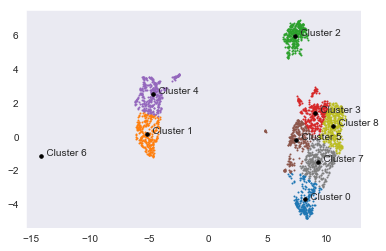

In [17]:
u.plot(km_umap)

In [37]:
final_comparer_red = final_comparer.copy()
for i in range (9):
    final_comparer_red.iloc[[i]] = final_comparer.iloc[[i]]-final_comparer.mean()

In [38]:
final_comparer_red

,AL627309.1,RP11-206L10.2,LINC00115,NOC2L,KLHL17,PLEKHN1,HES4,RP11-54O7.11,ISG15,AGRN,...,MT-ND4L,MT-ND4,MT-ND5,MT-ND6,MT-CYB,AC145212.1,AL592183.1,AL354822.1,PNRC2-1,SRSF10-1
Cluster,,,,,,,,,,,,,,,,,,,,,
0.0,0.010053,0.003646,0.001436,-0.021849,-0.000229,0.002680,-0.009224,0.001240,1.132654,0.013066,...,0.014370,0.272019,0.287189,0.051560,0.584094,-0.008342,-0.003894,-0.000078,-0.009305,-0.013134
1.0,-0.002900,0.004525,0.002755,0.009522,-0.002820,-0.002501,-0.067051,0.004709,-0.609550,-0.002478,...,-0.011160,0.073699,-0.240727,-0.038093,-0.488932,-0.010054,0.052253,0.003391,-0.010530,0.000746
2.0,0.002202,-0.001535,0.003868,0.053492,0.002282,0.002601,-0.074070,-0.001351,-0.230886,-0.002478,...,-0.008656,-0.393493,-0.140140,0.013546,-0.814659,-0.011012,0.001975,-0.002669,-0.027599,0.007116
3.0,0.001635,-0.001535,-0.001801,0.009274,-0.000552,-0.000233,-0.070102,-0.001351,-0.386215,-0.002478,...,0.013453,1.141087,0.149543,0.044158,0.764706,-0.013847,0.035988,-0.000402,0.009816,0.024122
4.0,-0.002900,0.001042,-0.001181,0.006101,0.002335,-0.002501,-0.076595,-0.001351,-0.703693,-0.002478,...,0.021220,0.229166,-0.182324,-0.011070,0.210115,-0.010960,0.026433,-0.000092,0.011166,-0.002878
5.0,-0.002900,-0.001535,-0.006336,-0.099569,-0.002820,-0.002501,-0.079172,-0.001351,-1.027732,-0.002478,...,-0.065706,-3.723271,-0.525576,-0.098699,-2.240447,0.074795,-0.120474,-0.002669,-0.037803,-0.023497
6.0,-0.002900,-0.001535,0.003404,-0.005413,0.000427,0.000746,-0.079172,-0.001351,-0.280979,0.000769,...,-0.017005,-0.054440,-0.054797,-0.040257,0.188124,-0.016114,0.015889,-0.002669,0.027132,-0.007263
7.0,0.000609,-0.001535,0.004190,0.037273,0.004198,-0.002501,0.527846,0.002158,2.067324,0.001031,...,0.018824,1.486618,0.542048,0.003056,0.898947,0.004938,-0.015211,0.007857,0.007811,0.008082
8.0,-0.002900,-0.001535,-0.006336,0.011169,-0.002820,0.004210,-0.072461,-0.001351,0.039077,-0.002478,...,0.034660,0.968615,0.164784,0.075798,0.898052,-0.009403,0.007042,-0.002669,0.029311,0.006705


In [39]:
for i in range(9):
    print(str(final_comparer_red[final_comparer_red.index == i].T.nlargest(n=10,columns=i))+ "\n")

Cluster        0.0
LYZ      47.126333
FTL      44.960418
S100A9   30.802817
FTH1     25.555766
S100A8   15.927201
CST3     12.493973
HLA-DRA   9.370166
CD74      9.265548
S100A4    8.928624
TYROBP    8.837694

Cluster         1.0
CD74      20.073273
HLA-DRA   12.755124
RPL13A     5.396544
HLA-DPB1   4.723639
RPL18A     4.368113
CD79A      3.673061
CD37       3.515567
HLA-DRB1   3.223317
HLA-DPA1   3.219642
RPS23      3.011646

Cluster        2.0
B2M      26.540061
NKG7     18.706540
GNLY     15.818583
MALAT1    8.635998
HLA-C     7.173566
GZMB      7.019444
HLA-A     5.596642
CCL5      4.785640
PRF1      3.686242
FGFBP2    3.576813

Cluster        3.0
RPL13    19.869542
RPL10    19.489753
RPL13A   17.936927
RPS6     17.371975
RPS3     15.156232
RPS18    15.085357
RPS12    13.842055
RPL3     13.814204
RPS2     13.797486
RPL32    12.251354

Cluster        4.0
MALAT1   40.654986
RPL13    11.274228
RPS6      9.073362
RPS27     8.073742
RPS12     7.998255
RPL13A    7.758899
RPL32     7.6053

## Creating GIFs

To show how kmeans actually clusters we created a gif that shows the clustering over a few iterations. the *Gifcreator* is a utility function based on normal kmeans. It is expanded by a script that saves a picture of the current state each run and stitches them together at the end.

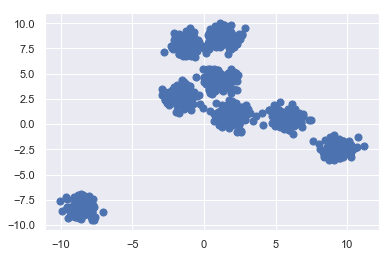

In [7]:
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
#generate data
X, y_true = make_blobs(n_samples=1000, centers=8,
                       cluster_std=0.60, random_state=0, )
plt.scatter(X[:, 0], X[:, 1], s=50);

In [8]:
gifs = u.Gifcreator()
gifs.create_gif(X)

Gif created!


Gifcreator(inits=10, k=None, maxit=None, method=None, tol=None)

<Figure size 432x288 with 0 Axes>

![SegmentLocal](./kmeans.gif "segment")